### Constantin Gleyze - Ecole Polytechnique & Sorbonne University

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Introduction</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

The goal of this project is to implement the Longstaff-Schwartz (2001) algorithm using a **regression approach and a Neural Network (FNN) one** for bermudean option as well as to propose a lower and upper bound through the primal and dual problem. 

The algorithms implemented in this repository assume that **dividends are continuously reinvested**. As a result, these methods are **not suitable for pricing American call options** and **American put options** with dividends not reinvested. 

We therefore consider a bermudean option $(C_t)_{t \in [0,T]}$ on an underlying, which has under the risk neutral probability $\mathbb{Q}$ the following dynamic : 

$\forall t \in [0,T], \space dX_t = X_t((r - q)dt + \sigma dW_t)$

with $r$ the risk-free interest rate, $q$ the continuous dividend yield, $\sigma$ the volatility and $(W_t)_{t \in [0,T]}$ a geometric brownian motion under $\mathbb{Q}$. 

We pose as $(\mathcal{F}_{t})_{t \in [0,T]}$ the natural filtration of the process $X$. 

We discretise $T$ in $N$ steps $t_0$,....,$t_N$ corresponding to the exercise date of the option.  

For each $n$  in {$0$,....,$N$}, the holder can exercise the option with payoff $\varphi_n(X):=\varphi(t_n,X_{t_n})$. 

In the case of a put, $\varphi_n(X):=(K - X_{t_n})_+$

In other word, the expected payoff at each exercise time $t_n$  in {$t_0$,....,$t_N$} at timAe $t_k$ such that $t_k\leq t_n$ is : 

- $\mathbb{E}^{\mathbb{Q}} \left[ D_{t_k, t_n} \varphi_n(X) \mid \mathcal{F}_{t_k} \right]$ with $ D_{t_k, t_n} := e^{-r(t_n-t_k)}$ the actualisation factor.

The price of the option can be expressed as : 

$C_0 = sup_{\tau \in \mathcal{T}_0^N}\mathbb{E}^{\mathbb{Q}}[D_{t_0, \tau} \varphi_{\tau}]$ with $\tau \in \mathcal{T}_0^N$ the set of $\mathcal{F}$ stopping times with $\mathbb{Q}$  always surely values in {$t_0$,....,$t_N$}. 


<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Longstaff-Schwartz algorithm</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

We remember the **Longstaff-Schwartz algorithm**, a backward algorithm, using the same notation as previous : 

**Step 1:** Simulate $n_1$ of the underlying between 0 and $T = t_n$ following the chosen discretisation.

**Step 2:** Fix $\hat{\tau}_N = t_N$

**Step 3:** For $i = N-1, \dots, 1$,

   Compute the continuation value $\hat{C}_{t_i} = \mathbb{E}^{\mathbb{Q}} \left[ D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \mid \mathcal{F}_{t_i} \right]$

   $\hat{\tau}_i =
    \begin{cases}
        t_i & \text{if } \hat{C}_{t_i} \leq \varphi_{t_i} \\
        \hat{\tau}_{i+1} & \text{otherwise}
    \end{cases}$
    
**Step 4:** Estimate the optimal strategy $\hat{\tau} = \hat{\tau}_1$ and the estimated price $\hat{C}_0$ of the option is :
   
   $\hat{C}_0 = \mathbb{E}^{\mathbb{Q}} \left[ D_{t_0, \hat{\tau}} \varphi_{\hat{\tau}} \right]$

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Longstaff-Schwartz in practice</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

We denote $\varphi_n^{(j)}:=\varphi(t_n,X_{t_n}^{(j)})$ and $\varphi_{\tau_{n}^{(j)}}^{(j)}:=\varphi(\tau_{n}^{(j)},X_{\tau_{n}^{(j)}}^{(j)})$

**Step 3:** For $i = N-1, \dots, 1$, the continuation value $\hat{C}_{t_i} = \mathbb{E}^{\mathbb{Q}} \left[ D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \mid \mathcal{F}_{t_i} \right] = \mathbb{E}^{\mathbb{Q}} \left[ D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \mid {X}_{t_i}=x \right]$ is estimated by resolving :
    
$\theta^* = \arg\min_{\theta \in \mathbb{R} } \mathbb{E}^{\mathbb{Q}} \left[ (D_{t_i, \hat{\tau}_{i+1}}\varphi_{\hat{\tau}_{i+1}} - f({X}_{t_i}; \theta))^2 \right]\Big|_{{X}_{t_i} = x}
$  and   $\space \mathbb{E}^{\mathbb{Q}} \left[ D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \mid {X}_{t_i} = x \right] \approx f({X}_{t_i}; \theta^*)$}

For example, we may choose $ f(X; \theta) = \sum_{k=0}^{n} \theta_k f_k(X)$ to be the linear sum of basis functions $\{f_k \}_{k=0}^{m}$. 

i.e $D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \approx \sum_{k=0}^{m} \theta_k f_k(X) + \epsilon$ where $\epsilon$ is an independant noise  and $\mathbb{E}^{\mathbb{Q}} \left[ D_{t_i, \hat{\tau}_{i+1}} \varphi_{\hat{\tau}_{i+1}} \mid {X}_{t_i} = x \right] \approx \sum_{k=0}^{m} \theta_k f_k({X}_{t_i})$
 
For example, the optimal function with polynomial degree m would be :
$\phi(x,\theta^*) = \sum_{k=0}^{m} \theta_k^* f_k(x) = \begin{pmatrix} \theta_0^*, \cdots, \theta_m^* \end{pmatrix} \begin{pmatrix} 1 \\ x \\ \vdots \\ x^m \end{pmatrix}.$

Hence, for each generated path $j=1,..,n_1$ and for $i = 1, \dots, N-1$:  $\space\hat{C}_{t_i}^{(j)} = \sum_{k=0}^{m} \theta_k^{*,i} f_k(X_{t_i}^{(j)})$

with terminal value $\hat{C}_{t_N}^{(j)} = e^{-rt_N}\varphi_N^{(j)}$ for j within {$1$,..,$n_1$}

We will also in this project use a **Feedforward Neural Network** to compute these continuation values, using non linear regressions. 

In the case of **Neural Network** we consider the parametric function, for a fixed $L \ge 2$, defined by the composition of functions

$
    \Phi(x; \theta) = A_L \circ \big( \sigma \circ A_{L-1} \big) \circ \cdots \circ \big( \sigma \circ A_1 \big)(x)
$

with $\theta = \big( W_\ell, \beta_\ell \big)_{1 \le \ell \le L}$ and for all $\ell \in \{1,\dots,L\}$, the affine function $A_\ell$ is written as $A_\ell(x) = W_\ell x + \beta_\ell$. 

The function $\sigma$ is the ReLU function.


**Step 4:** $\hat{\tau} = \inf_{i=1,\dots,N} \left\{ t_i \mid \hat{C}_{t_i} \leq \varphi_{t_i} \right\}$
  
i.e for each generated path j within {$1$,..,$n_1$}: 

$\hat{\tau}^{(j)} = \inf_{i=1,\dots,N} \left\{ t_i \mid \hat{C}_{t_i}^{(j)} \leq \varphi_{t_i}^{(j)} \right\}$

and $\hat{C}_0 = \mathbb{E}^{\mathbb{Q}} \left[ D_{0, \hat{\tau}} \varphi_{\hat{\tau}} \right]$ = $\frac{1}{n_1} \sum_{j=1}^{n_1} D_{0, \hat{\tau}^{(j)}} \varphi_{\hat{\tau}^{(j)}}^{(j)}$.

   

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Improvments of the Longstaff-Schwartz algorithm - Lower bound Price</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

One of the main problem with this backward approach is the approximate error due to the approximation of the continuation value $\hat{C}_{t_i}^{(j)}$. 

Moroever, the construction of the stopping time make them not adapted to $(\mathcal{F}_{t})_{t \in [0,T]}$ as they can "look" in the future by construction. 

Therefore, to obtain a low-biaised price, we can do the following algorithm : 

**Step 1:** Run a Longstaff-Schwartz algorithm with $n_1$ paths and obtain an estimation of the optimal strategy i.e ${\begin{pmatrix} \theta_0^{*,i}  \\ \vdots \\ \theta_m^{*,i} \end{pmatrix}}_{i = 1,..,N-1}$

**Step 2:** Simulate $n_2$ new independant paths such that for each path j in {$1$,..,$n_2$} they are stopped according :

   $\hat{\tau}^{(j)} = \inf_{i=1,\dots,N} \left\{ t_i \mid \hat{C}_{t_i}^{(j)} \leq \varphi_{t_i}^{(j)} \right\}$ 
   
   and compute the average payoff $\hat{C}_0 = \mathbb{E}^{\mathbb{Q}} \left[ D_{0, \hat{\tau}} \varphi_{\hat{\tau}} \right]$ = $\frac{1}{n_2} \sum_{j=1}^{n_2} D_{0, \hat{\tau}^{(j)}} \varphi_{\hat{\tau}^{(j)}}^{(j)}$


<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">The Broadie-Andersen algorithm - Upper bound price</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

We consider the same bermudean option as above with the same notation. 

**Step 1:** Run first a primal Longstaff-Schwartz algorithm with $n_1$ paths to obtain the matrix of nearly optimal stopping times $(\tau_{i,j})_{ij}$ for $i$ = $1$,..,$N$ and $j$ = $1$,..,$n_1$.

   We pose $V_{t_i}^{(j)} =\mathbb{E}^{\mathbb{Q}} \left[ D_{0, {\tau}_{i}^{(j)}} \varphi_{{\tau}_{i}^{(j)}}^{(j)} \mid \mathcal{F}_{t_i} \right]$ we will be using as an approximation of the Snell envelope of $D_{0,t}\varphi_t$.

**Step 2:** Simulate $n_2$ new independent paths. For each of these paths at time $t_i$, we need to estimate $V_{t_i}^{(j)}$ and $\space \mathbb{E}^{\mathbb{Q}} \left[ V_{t_{i+1}}^{(j)} \mid \mathcal{F}_{t_i} \right]$.

   **If $\tau_i^{(j)} > t_i$**:

   We simulate $n_c$ new independent subpaths starting from $(t_i,X_{t_i})$ and we do another lower bound LS algorithm. 
   
   More precisely, for $m$ in {$1$, ... , $n_c$}, we define $\tau^{m} = \inf_{t_{i+1} \leq {t_j} \leq {t_N}} (\hat{C}_{t_j}^{(m)} \leq \varphi_{t_j}^{(m)})$

   and $V_{t_i}^{(j)} = \mathbb{E}^{\mathbb{Q}} \left[ V_{t_{i+1}}^{(j)} \mid \mathcal{F}_{t_i} \right] \approx \frac{1}{n_c} \sum_{m=1}^{n_c} D_{0,\tau^{m}} \varphi_{\tau^{m}}^{(m)}$

   **If $\tau_i^{(j)} = t_i$**:

   $V_{t_i}^{(j)} = D_{t_i}^{(j)}\varphi_{t_i}^{(j)}$ and $V_{t_i}^{(j)} = \mathbb{E}^{\mathbb{Q}} \left[ V_{t_{i+1}}^{(j)} \mid \mathcal{F}_{t_i} \right] \approx \frac{1}{n_e} \sum_{m=1}^{n_e} D_{0,\tau^{m}} \varphi_{\tau^{m}}^{(m)}$ for $m$ in {$1$, ... , $n_e$}. 

**Step 3:** We then build the martingale $(M_n)_{n = 0,..,N}$ such that :

   $M_0 = 0$ and $M_{t_{i+1}}^{(j)} = M_{t_i}^{(j)} + V_{t_{i+1}}^{(j)} - \mathbb{E}^{\mathbb{Q}}\left[ V_{t_{i+1}}^{(j)} \mid \mathcal{F}_{t_i} \right]$

   and then compute the upper bound price $\mathbb{E}^{\mathbb{Q}} \left[ \max_{1 \leq i \leq N} \left( D_{0,t_i} \varphi_{t_i} - M_{t_i} \right) \right] = \sum_{j=1}^{n_2} (\max_{1 \leq i \leq N}  (D_{0,t_i}^{(j)} \varphi_{t_i}^{(j)} - M_{t_i}^{(j)}))$

   The complexity of this algorithm is at most $n_1 + n_2*(N-1)*max(n_c,n_e)$. 
   
**Note:**

We initialize $V_{t_0}^{(j)} = $ lower bound price we want to compare with.

In [30]:
import torch
from torch import nn
import joblib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
plt.rc('figure', figsize=(6, 5.5))
plt.rc('axes', grid=True, xmargin=0, ymargin=0, autolimit_mode='round_numbers')
import time
import pandas as pd
import warnings
warnings.simplefilter('ignore', np.RankWarning)  # Ignore les RankWarnings
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
device = "cpu"
from tqdm import tqdm

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">General functions</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

In [182]:
def paths_simulation(ts, n_paths, S0, vol, r=0, q=0, rng= None):

    """Generate trajectories in Black-Scholes model.

    Parameters
    ----------
    ts: array_like
        The time steps of the simulation. 
    S: scalar
       The spot price of the underlying.
    vol: scalar
         The implied Black-Scholes volatility.
    r: scalar
       The annualized risk-free interest rate, continuously compounded (default: 0).
    q: scalar
       The annualized continuous dividend yield (default: 0).
    rng: random generator
         The specific generator if we want to replicate the results (default: None). 

    Returns
    -------
    paths: ndarray
        The paths.
    """
    
    #If no generator is given, we initialize one
    if rng is None : 
        rng = np.random.default_rng() 

    #We construct our matrix for the prices and initialize it 
    paths = np.full((len(ts), n_paths), np.nan, dtype=np.float64)
    paths[0] = S0

    #We generrate our paths
    for i in range(1,len(ts)):
        dt = ts[i] - ts[i-1]
        dW = np.sqrt(dt)*rng.standard_normal(n_paths)
        paths[i,:] = paths[i-1,:] * np.exp((r-q-(1/2)*vol**2)*dt + vol*dW)
    return paths


def plot_continuation (args_simu,NN,Reg,args_NN,args_Reg,title): 
    
    """
    Plot continuation values of an American option pricing algorithm using either 
    Neural Networks or Regression-based methods.

    Parameters
    ----------
    args_simu: tuple
               Tuple containing (ts, n_paths, S0, vol, r, q, T, K, payoff_function, rng).
    NN: bool
        Flag to activate Neural Network-based method.
    Reg: bool
         Flag to activate Regression-based method.
    args_NN: tuple
             Neural Net arguments: (thetas, mean_x, std_x, mean_y, std_y, layer_sizes).
    args_Reg: tuple
              Regression arguments: (thetas, base functions).
    title: str or None
           Custom title for the plot.

    Returns
    -------
    None
        Displays a matplotlib plot of the continuation values.
    """
    
    # Unpack simulation arguments
    ts, n_paths, S0 , vol, r, q, T,K,payoff_function, rng = args_simu
    N = len(ts)

    # Define evaluation grid for the asset price
    x_vals_np = np.linspace(90,130,1000)
    
    # Create the figure
    plt.figure(figsize=(8, 6))

    if NN: 
        
        thetas_NN, mean_x, std_x, mean_y, std_y, layer_sizes = args_NN # Unpack neural network parameters

        # Normalize input prices
        x_vals = torch.from_numpy(x_vals_np.astype(np.float32)).to(device)
        x_vals_norm = (x_vals - mean_x) / std_x

        phi = NeuralNetwork(1, layer_sizes, 1).to(device) # Initialize NN architecture
        payoff = torch.tensor(payoff_function(x_vals_np, K)).to(device) # Compute payoff in PyTorch

    elif Reg: 

        thetas_Reg, base = args_Reg # Unpack regression parameters

        # Input remains in NumPy
        x_vals = x_vals_np 
        payoff = payoff_function(x_vals, K)
        
    # Loop through time steps and plot continuation values
    for n in range(1, N-1):  # skip t=0 and t=T
        if NN: 
            phi.load_state_dict(thetas_NN[n - 1])
            with torch.no_grad():
                cont = phi(x_vals_norm[:, None]).flatten()
            continuation = (mean_y + cont * std_y).cpu().numpy()
        else: 
            continuation = thetas_Reg[n] @ base(x_vals)
            
        disc_payoff = np.exp(-r * ts[n]) * payoff.cpu().numpy() if NN else np.exp(-r * ts[n]) * payoff # Discounted payoff for comparison
        plt.plot(x_vals_np, np.maximum(disc_payoff, continuation), linestyle='--', label=fr'$t_{{{n}}} = {ts[n]:.2f}$') # Plot continuation vs discounted payoff
    
    # Final maturity payoff (discounted)
    disc_final = np.exp(-r * ts[-1]) * payoff.cpu().numpy() if NN else np.exp(-r * ts[-1]) * payoff
    plt.plot(x_vals_np, disc_final, label='Payoff at T', color='red', linewidth=2)

    # Axis and title settings
    plt.xlabel("S")
    plt.ylabel("P&L")
    plt.ylim(-0.5, None) 
    if title is None : 
        title = "Neural Network" if NN else "Regression functions"
    plt.title(f"Continuation Values vs Payoff Function - {title}")
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()

def plot_optimal_trajectories_from_model(args_simu, NN, Reg, args_NN, args_Reg, n_samples=10,title =""):
    
    """
    Plots simulated paths of the underlying asset where each trajectory is stopped
    according to the optimal exercise strategy (payoff >= continuation value).
    
    Parameters
    ----------
    args_simu: tuple
               Tuple of simulation arguments (ts, n_paths, S0, vol, r, q, T, K, payoff_function, rng).
    NN: bool
        Whether to use the neural network approximation.
    Reg: bool
         Whether to use the regression-based approximation.
    args_NN: tuple
             Neural net parameters (thetas, mean_x, std_x, mean_y, std_y, layer_sizes).
    args_Reg: tuple
              Regression parameters (thetas, base).
    n_samples: int
               Number of trajectories to plot.
    title: str
           Custom label to include in the plot title (e.g., model name or setting).
    """

    ts, n_paths, S0, vol, r, q, T, K, payoff_function, rng = args_simu # Unpack simulation parameters
    N = len(ts)
    S = paths_simulation(ts, n_paths, S0, vol, r, q, rng) # Simulate asset paths
    payoffs = payoff_function(S, K)
    discount = np.exp(-r * ts[:, None])
    payoff_actu = discount * payoffs # Discounted payoffs

    plt.figure(figsize=(10, 6))
    indices = np.random.choice(S.shape[1], size=min(n_samples, S.shape[1]), replace=False) # Randomly select paths to plot

    # Loop over selected paths
    for j in indices:
        path = S[:, j] # Extract trajectory
        payoff_path = payoff_actu[:, j] # Corresponding discounted payoffs

        stopping_index = N - 1  # Default: exercise at maturity

        # Loop over time to find optimal exercise index
        for n in range(1, N - 1):  
            S_n = S[n, j]  # Spot at time n

            # Compute continuation value
            if NN:
                thetas, mean_x, std_x, mean_y, std_y, layer_sizes = args_NN
                phi = NeuralNetwork(1, layer_sizes, 1).to(device)
                phi.load_state_dict(thetas[n - 1])
                x = torch.tensor([(S_n - mean_x) / std_x], dtype=torch.float32).to(device)
                with torch.no_grad():
                    cont = phi(x).item()
                continuation = mean_y + cont * std_y # Rescale continuation to original scale
                
            elif Reg:
                thetas, base = args_Reg
                continuation = thetas[n] @ base(np.array([S_n])) # Regression-based continuation

            # Stop if exercising is optimal
            if payoff_actu[n, j] >= continuation:
                stopping_index = n
                break

        plt.plot(ts[:stopping_index + 1], path[:stopping_index + 1]) # Plot trajectory up to stopping time

    plt.xlabel("t")
    plt.ylabel("S")

    # Set appropriate title depending on the method
    if NN : 
        title_final = f"Neural Network Optimal Exercise Trajectories with {title}"
    elif Reg: 
        title_final = f"Regression approach Optimal Exercise Trajectories with {title}"
    plt.title(title_final)
    plt.grid(True)
    plt.show()


<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Calibration</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

In [114]:
class NeuralNetwork(nn.Module):
    
    """
    Fully connected feedforward neural network with ReLU activations.

    Parameters
    ----------
    input_size: int
                Number of input features.
    layer_sizes: list
                 List containing the number of neurons in each hidden layer.
    output_size: int
                 Number of outputs (typically 1 for regression).

    Methods
    -------
    forward(x): Applies the network transformation to input x.
    """
    
    def __init__(self, input_size, layer_sizes, output_size):
        super().__init__()
        layers = []
        in_dim = input_size
        for hidden_dim in layer_sizes:
            layers.append(nn.Linear(in_dim, hidden_dim))
            layers.append(nn.ReLU()) # ReLU activation between hidden layers
            in_dim = hidden_dim
        layers.append(nn.Linear(in_dim, output_size)) # Final linear layer
        self.linear_relu_stack = nn.Sequential(*layers)

    def forward(self, x):
        out = self.linear_relu_stack(x)
        return out

def theta_by_NN (S,payoff, layer_sizes, n_epochs, batch_size, learning_rate = 1e-3, theta_init = None, device = device): 
    
    """
    Trains a neural network to approximate continuation values.

    Parameters
    ----------
    S: torch.Tensor
       Input stock prices (normalized).
    payoff: torch.Tensor
            Corresponding payoffs (normalized).
    layer_sizes: list
                 List of hidden layer sizes for the neural network.
    n_epochs: int
              Number of training epochs.
    batch_size: int
                Batch size used in gradient descent.
    learning_rate: float, optional
                   Learning rate for the optimizer (default: 1e-3).
    theta_init: dict or None
                Initial network weights if provided (default: None).
    device: torch.device
            Device on which to train (CPU or CUDA).

    Returns
    -------
    state_dict: dict
                Trained network parameters (weights).
    continuation: torch.Tensor
                  Network output (continuation values) on the input data.
    """
    
    data_size, input_size = S.shape
    n_update = data_size // batch_size
    phi = NeuralNetwork(input_size, layer_sizes, output_size=1).to(device) # Instantiate network
    
    if theta_init is not None:
        phi.load_state_dict(theta_init.copy()) # Warm-start from previous weights
        
    optimizer = torch.optim.Adam(phi.parameters(), lr=learning_rate)

    # Training loop
    with tqdm(range(n_epochs)) as nrange:
        for n in nrange:
            indexes = torch.randperm(data_size) # Shuffle dataset
            for k in range(n_update):
                idx = indexes[ k*batch_size : (k+1)*batch_size ] 
                loss = ((payoff[idx] - phi(S[idx]))**2).mean() # MSE loss
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            nrange.set_postfix(loss=loss.item()) # Display loss

    return phi.state_dict(),phi(S) # Return weights and predicted continuation
        
def LS_NN_calibration(S,payoffs, layer_sizes, n_epochs, batch_size, learning_rate = 1e-3, theta_init = None, device = device) :
    
    """
    Calibrates continuation value approximations using a backward induction 
    with a neural network.

    Parameters
    ----------
    S: ndarray
       Simulated stock price paths of shape (N, M).
    payoffs: ndarray
             Discounted payoff values of shape (N, M).
    layer_sizes: list
                 Architecture of the hidden layers for the neural network.
    n_epochs: int
              Number of epochs for training the final layer.
    batch_size: int
                Batch size for mini-batch gradient descent.
    learning_rate: float, optional
                   Learning rate for the optimizer (default: 1e-3).
    theta_init: dict or None
                Initial parameters for warm-starting (default: None).
    device: torch.device
            Device for computation (default: CUDA if available).

    Returns
    -------
    thetas: list
            List of trained parameters (dictionaries) for each time step.
    mean_x: float
            Mean of the input paths (for normalization).
    std_x: float
           Standard deviation of input paths.
    mean_y: float
            Mean of the payoffs (for normalization).
    std_y: float
           Standard deviation of the payoffs.
    """
    # Convert inputs to torch tensors
    xj_path_not_norm = torch.from_numpy(S.astype(np.float32)).to(device).float()
    yj_path_not_norm = torch.from_numpy(payoffs.astype(np.float32)).to(device).float()

    # Compute normalization statistics
    mean_x, std_x = xj_path_not_norm.mean(), xj_path_not_norm.std()
    mean_y, std_y = yj_path_not_norm.mean(), yj_path_not_norm.std()

    # Normalize input and output
    xj_path = (xj_path_not_norm-mean_x)/std_x
    yj_path = (yj_path_not_norm - mean_y)/std_y

    # Init model and variables
    phi = NeuralNetwork(1, layer_sizes, 1).to(device)
    theta_n = phi.state_dict()
    thetas = []
    N = S.shape[0]
    payoff_opt = yj_path[N-1].clone()

    # Backward induction loop
    for n in reversed(range(1, N-1)):
        theta_n,cont_value_n =  theta_by_NN(xj_path[n][:,None], payoff_opt[:,None], 
                                               layer_sizes, 
                                               n_epochs if n == N-2 else 5, 
                                               batch_size, theta_init = theta_n) # Because of the warm approach, we reduce our epoch after the first optimization
        
        thetas.insert(0, theta_n) # Store parameters for time step n
        stop_at_n = yj_path[n,:] >= cont_value_n.flatten() # Optimal stopping condition
        payoff_opt[stop_at_n] = yj_path[n, stop_at_n].clone() # Update optimal payoff

    return thetas, mean_x, std_x, mean_y, std_y

def theta_by_regression(payoff, S, base):

    """
    Computes regression coefficients for continuation value approximation.

    Parameters
    ----------
    payoff: ndarray
            Vector of continuation or terminal payoffs.
    S: ndarray
       Vector of stock prices at a given time step.
    base: callable
          Function that returns basis functions evaluated at S.

    Returns
    -------
    theta: ndarray
           Regression coefficients for the basis functions.
    """
    
    norm = (base(S) @ base(S).T) # Compute Gram matrix
    return np.linalg.inv(norm) @ (base(S) @ payoff) # Solve least squares using closed-form

def LS_Reg_calibration (S, payoffs, base): 
    
    """
    Calibrates continuation value approximations using backward induction 
    with linear regression on basis functions.

    Parameters
    ----------
    S: ndarray
       Simulated stock price paths of shape (N, M).
    payoffs: ndarray
             Discounted payoff values of shape (N, M).
    base: callable
          Function returning basis functions evaluated at each price.

    Returns
    -------
    thetas: ndarray
            Array of shape (N-1, K) with regression coefficients for each time step.
    """
    
    N,M = S.shape # Number of time steps and paths
    m = base([0]).shape[0] # Number of basis functions
    
    payoff_opt = payoffs[N-1].copy() # Initialize optimal payoffs at maturity
    thetas = np.zeros((N-1, m)) # Store regression coefficients for each time step
    
    for n in reversed(range(1, N-1)):
        thetas[n] = theta_by_regression(payoff_opt, S[n], base) # Regress continuation value
        stop_at_n = payoffs[n] >= np.dot(thetas[n], base(S[n])) # Stopping condition
        payoff_opt[stop_at_n] = payoffs[n, stop_at_n].copy() # Update payoff if exercise is optimal
        
    return thetas # Return list of regression coefficients

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Primal Price (Lower Bound)</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

In [115]:
def LS_NN_lower_bound (S, payoffs, thetas, mean_x, std_x, mean_y, std_y,layer_sizes):

    """
    Computes the lower bound price estimate using a neural network approximation 
    of continuation values.

    Parameters
    ----------
    S: ndarray
       Simulated price paths of shape (N, M).
    payoffs: ndarray
             Discounted payoff values of shape (N, M).
    thetas: list
            List of trained neural network weights for each time step.
    mean_x: float
            Mean of input stock prices (for normalization).
    std_x: float
           Standard deviation of stock prices.
    mean_y: float
            Mean of payoffs (for normalization).
    std_y: float
           Standard deviation of payoffs.
    layer_sizes: list
                 Hidden layer sizes of the neural network.

    Returns
    -------
    lower_bound: float
                 Estimated lower bound price.
    """
    
    S = torch.from_numpy(S.astype(np.float32)).to(device).float() # Convert stock paths to torch tensor
    payoffs = torch.from_numpy(payoffs.astype(np.float32)).to(device).float() # Convert payoffs to tensor
    phi = NeuralNetwork(1, layer_sizes, 1).to(device) # Dummy NN instance to load weights
    
    xj_path = (S - mean_x)/std_x # Normalize inputs
    yj_path = (payoffs - mean_y)/std_y # Normalize targets
    N,M = S.shape
    payoff_opt = yj_path[N-1].clone() # Final payoff is always optimal

    for n in reversed(range(1, N-1)):
        phi.load_state_dict(thetas[n-1]) # Load weights for time n
        with torch.no_grad():
            cont_at_n = phi(xj_path[n,:][:,None]).flatten() # Predict continuation
        stop_at_n = yj_path[n,:] >= cont_at_n # Compare with payoff
        payoff_opt[stop_at_n] = yj_path[n, stop_at_n].clone() # Exercise if better

    lower_bound = mean_y + payoff_opt*std_y # De-normalize output
    return np.mean(lower_bound.detach().numpy().flatten()) # Return expected value

def LS_Reg_lower_bound (S, payoffs, thetas,base):
    
    """
    Computes the lower bound price using regression-based approximation 
    of continuation values in an American option framework.

    Parameters
    ----------
    S: ndarray
       Simulated stock price paths of shape (N, M).
    payoffs: ndarray
             Discounted payoff values of shape (N, M).
    thetas: ndarray
            Array of regression coefficients (N-1, d), one for each time step.
    base: callable
          Function returning basis functions evaluated on a price array.

    Returns
    -------
    lower_bound: float
                 Estimated lower bound price at time 0.
    """
    
    N,M = S.shape # Final payoff is always optimal
    payoff_opt = payoffs[N-1].copy()
    for n in reversed(range(1, N-1)):
        stop_at_n = payoffs[n] >= np.dot(thetas[n], base(S[n])) # Identify paths where exercising is optimal
        payoff_opt[stop_at_n] = payoffs[n, stop_at_n].copy() # Overwrite only where exercise happens
        
    return np.mean(payoff_opt) # Expected value at time 0

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Dual Price (Upper Bound)</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

In [151]:
def BA_NN_upper_bound (S_data, payoffs_data,lower_bound_NN, thetas, mean_x, std_x, mean_y, std_y,layer_sizes, args_simu)  : 

    """
    Computes the upper bound price estimate using the dual formulation with 
    neural network-based continuation value approximation.

    Parameters
    ----------
    S_data: ndarray
            Simulated stock price paths of shape (N, M).
    payoffs_data: ndarray
                  Discounted payoff values of shape (N, M).
    lower_bound_NN: ndarray
                    Lower bound value estimate at time 0.
    thetas: list
            Trained neural network weights for each time step.
    mean_x, std_x, mean_y, std_y: float
            Normalization parameters for input and output.
    layer_sizes: list
                 Neural network architecture.
    args_simu: tuple
               Parameters for nested simulations.

    Returns
    -------
    upper_bound: float
                 Estimated upper bound price.
    """
    
    ts, ne_paths,nc_paths, vol, r, q, T,K,payoff_function = args_simu

    # Convert inputs to torch tensors
    S = torch.from_numpy(S_data.astype(np.float32)).to(device).float()
    payoffs = torch.from_numpy(payoffs_data.astype(np.float32)).to(device).float()
    
    phi = NeuralNetwork(1, layer_sizes, 1).to(device)

    # Normalize paths and payoffs
    xj_path = (S - mean_x)/std_x
    yj_path = (payoffs - mean_y)/std_y
    
    N,M = S.shape
    payoff_opt = yj_path[N-1].clone()

    # Initialize value and expected value arrays and first value
    V = np.full(S.shape, np.nan, dtype = np.float64)
    EV = np.full(S.shape, np.nan, dtype = np.float64)
    V[0,:] = lower_bound_NN
    EV[0,:] = lower_bound_NN

    # Backward induction with nested simulation
    for n in reversed(range(1, N-1)):
        
        phi.load_state_dict(thetas[n-1])
        with torch.no_grad():
            cont_at_n = phi(xj_path[n,:][:,None]).flatten()
        stop_at_n = yj_path[n,:] >= cont_at_n # Determine which paths satisfy the exercise condition at time n
        
        for j in range (M): 

            # If stopping is optimal, simulate nested payoff for EV only
            if stop_at_n[j]: 
                V[n, j] = payoffs_data[n,j] # Immediate exercise value
                S_nested = paths_simulation(ts[n:], ne_paths, S_data[n, j], vol, r, q) # Nested paths from time n
                discount = np.exp(-r * (ts[n:]- ts[n]))[:, None]
                payoffs_nested = discount * payoff_function(S_nested, K) # Discounted nested payoffs
                EV[n,j] = np.exp(-r * ts[n]) *LS_NN_lower_bound (S_nested, payoffs_nested, thetas[n:], mean_x, std_x, mean_y, std_y,layer_sizes) # Expected value update discounted to time 0
            
            # Otherwise, simulate nested payoff for both
            else : 
                S_nested = paths_simulation(ts[n:], nc_paths, S_data[n, j], vol, r, q) # Nested paths from time n
                discount = np.exp(-r * (ts[n:] - ts[n]))[:, None]
                payoffs_nested = discount * payoff_function(S_nested, K) # Discounted nested payoffs
                new_lower_bound = np.exp(-r * ts[n]) *LS_NN_lower_bound (S_nested, payoffs_nested, thetas[n:], mean_x, std_x, mean_y, std_y,layer_sizes) # Expected value update discounted to time 0
                V[n,j] = new_lower_bound
                EV[n,j] = new_lower_bound
                
    V[-1,:] = payoffs_data[-1] # Set terminal value

    # Compute martingale correction
    M = np.zeros(S_data.shape, dtype=np.float64)
    M[1:] = np.cumsum(V[1:]-EV[:-1], axis=0) 

    # Apply dual correction
    payoff_dual = payoffs_data[1:] - M[1:]
    upper_bound = np.mean(np.max(payoff_dual, axis=0))
    
    return upper_bound
    
    
def BA_Reg_upper_bound (S, payoffs,lower_bound_Reg, thetas,base, args_simu): 
    
    """
    Computes the upper bound price estimate using the dual formulation with 
    regression-based continuation value approximation.

    Parameters
    ----------
    S: ndarray
       Simulated stock price paths of shape (N, M).
    payoffs: ndarray
             Discounted payoff values of shape (N, M).
    lower_bound_Reg: ndarray
                     Estimated lower bound at time 0 using regression method.
    thetas: list
            Regression coefficients for each time step.
    base: callable
          Function returning basis functions evaluated at each price.
    args_simu: tuple
               Parameters used for nested simulations.

    Returns
    -------
    upper_bound: float
                 Estimated upper bound price.
    """
    
    ts, ne_paths,nc_paths, vol, r, q, T,K,payoff_function = args_simu

    # Initialize value and expected value arrays and first value
    V = np.full(S.shape, np.nan, dtype = np.float64)
    EV = np.full(S.shape, np.nan, dtype = np.float64)
    V[0,:] = lower_bound_Reg
    EV[0,:] = lower_bound_Reg

    N,M = S.shape

    # Backward loop over exercise dates
    for n in reversed(range(1, N-1)):
        stop_at_n = payoffs[n] >= np.dot(thetas[n], base(S[n])) # Determine which paths satisfy the exercise condition at time n

        for j in range (M): 

            # If stopping is optimal, simulate nested payoff for EV only
            if stop_at_n[j]: 
                V[n, j] = payoffs[n,j]
                S_nested = paths_simulation(ts[n:], ne_paths, S[n, j], vol, r, q) # Nested paths from time n
                discount = np.exp(-r * (ts[n:]- ts[n]))[:, None]
                payoffs_nested = discount * payoff_function(S_nested, K) # Discounted nested payoffs
                EV[n,j] = np.exp(-r * ts[n]) *LS_Reg_lower_bound (S_nested, payoffs_nested, thetas[n:],base) # Expected value update discounted to time 0

            # Otherwise, simulate nested payoff for both
            else : 
                S_nested = paths_simulation(ts[n:], nc_paths, S[n, j], vol, r, q) # Nested paths from time n
                discount = np.exp(-r * (ts[n:]- ts[n]))[:, None]
                payoffs_nested = discount * payoff_function(S_nested, K) # Discounted nested payoffs
                new_lower_bound = np.exp(-r * ts[n]) *LS_Reg_lower_bound (S_nested, payoffs_nested, thetas[n:],base) # Expected value update discounted to time 0
                V[n,j] = new_lower_bound
                EV[n,j] = new_lower_bound
                
    V[-1,:] = payoffs[-1] # Set terminal value

    # Compute martingale correction
    M = np.zeros(S.shape, dtype=np.float64)
    M[1:] = np.cumsum(V[1:]-EV[:-1], axis=0) 

    # Apply dual correction
    payoff_dual = payoffs[1:] - M[1:]
    upper_bound = np.mean(np.max(payoff_dual, axis=0))
    
    return upper_bound

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Callable Functions</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

In [152]:
def calibration (args_simu, NN, Reg, args_NN, args_Reg): 

    """
    Performs calibration of the continuation value model using either neural networks or regression.

    Parameters
    ----------
    args_simu: tuple
               Simulation parameters (ts, n_paths, S0, vol, r, q, T, K, payoff_function, rng).
    NN: bool
        Whether to use neural network-based calibration.
    Reg: bool
         Whether to use regression-based calibration.
    args_NN: tuple
             Neural network configuration (layer_sizes, n_epochs, batch_size, learning_rate).
    args_Reg: object
              Basis function or arguments used for regression.

    Returns
    -------
    Calibration output depending on method:
        - If NN: thetas, mean_x, std_x, mean_y, std_y
        - If Reg: thetas
    """
    
    ts, n_paths, S0 , vol, r, q, T,K,payoff_function, rng = args_simu

    # Simulate price paths and compute discounted payoffs
    S = paths_simulation(ts, n_paths, S0 , vol, r, q,rng)
    payoffs = payoff_function (S,K)
    N = len(ts)
    discount =  np.array([np.exp(-r*n*T/(N-1)) for n in range (0,N)])
    payoff_actu = discount[:, None] * payoffs

    # Perform calibration based on selected method
    if NN : 
        layer_sizes, n_epochs, batch_size, learning_rate = args_NN
        return LS_NN_calibration(S,payoff_actu, layer_sizes, n_epochs, batch_size, learning_rate)
    elif Reg : 
        return LS_Reg_calibration (S, payoff_actu, args_Reg)

def lower_bound (args_simu, NN, Reg, args_NN, args_Reg): 

    """
    Computes the lower bound estimate of the option price using either neural networks or regression.

    Parameters
    ----------
    args_simu: tuple
               Simulation parameters (ts, n_paths, S0, vol, r, q, T, K, payoff_function, rng).
    NN: bool
        Whether to use neural network-based estimation.
    Reg: bool
         Whether to use regression-based estimation.
    args_NN: tuple
             Neural network parameters (thetas, mean_x, std_x, mean_y, std_y, layer_sizes).
    args_Reg: tuple
              Regression parameters (thetas, base).

    Returns
    -------
    lower_bound: float
                 Estimated lower bound price.
    """

    # Simulate price paths and compute discounted payoffs
    ts, n_paths, S0 , vol, r, q, T,K,payoff_function, rng = args_simu
    S = paths_simulation(ts, n_paths, S0 , vol, r, q,rng)
    payoffs = payoff_function (S,K)
    N = len(ts)
    discount =  np.array([np.exp(-r*n*T/(N-1)) for n in range (0,N)])
    payoff_actu = discount[:, None] * payoffs

    # Compute lower bound depending on the method
    if NN : 
        thetas, mean_x, std_x, mean_y, std_y,layer_sizes = args_NN
        return LS_NN_lower_bound (S, payoff_actu, thetas, mean_x, std_x, mean_y, std_y,layer_sizes)
    elif Reg : 
        thetas,base = args_Reg 
        return LS_Reg_lower_bound (S, payoff_actu, thetas,base)

def upper_bound (args_simu, NN, Reg, args_NN, args_Reg):

    """
    Computes the upper bound estimate of the option price using the dual formulation, 
    based on either neural networks or regression methods.

    Parameters
    ----------
    args_simu: tuple
               Simulation parameters (ts, n_paths, ne_paths, nc_paths, S0, vol, r, q, T, K, payoff_function, rng).
    NN: bool
        Whether to use neural network-based estimation.
    Reg: bool
         Whether to use regression-based estimation.
    args_NN: tuple
             Neural network parameters (thetas, mean_x, std_x, mean_y, std_y, layer_sizes, lower_bound_NN).
    args_Reg: tuple
              Regression parameters (thetas, base, lower_bound_Reg).

    Returns
    -------
    upper_bound: float
                 Estimated upper bound price.
    """
    
    ts, n_paths, ne_paths, nc_paths, S0 , vol, r, q, T,K,payoff_function, rng = args_simu

    # Simulate price paths and compute discounted payoffs
    S = paths_simulation(ts, n_paths, S0 , vol, r, q,rng)
    payoffs = payoff_function (S,K)
    N = len(ts)
    discount =  np.array([np.exp(-r*n*T/(N-1)) for n in range (0,N)])
    payoff_actu = discount[:, None] * payoffs

    # Prepare nested simulation configuration
    args_simu_nested = (ts, ne_paths,nc_paths, vol, r, q, T,K,payoff_function)

    # Compute upper bound depending on the method (we use the lower bound we want to compare with as an argument)
    if NN : 
        thetas, mean_x, std_x, mean_y, std_y,layer_sizes,lower_bound_NN = args_NN
        return BA_NN_upper_bound (S, payoff_actu, lower_bound_NN, thetas, mean_x, std_x, mean_y, std_y,layer_sizes, args_simu_nested)
    elif Reg: 
        thetas, base,lower_bound_Reg = args_Reg
        return BA_Reg_upper_bound (S, payoff_actu,lower_bound_Reg, thetas,base, args_simu_nested)

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Applications - Put OTM</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

In [174]:
S0 = 100  # Initial spot price
K = 110  # Strike price
T = 1  # Maturity in years
ts = np.linspace(0, T, 11)  # Time grid with 11 dates
vol = 0.25  # Volatility
r = 0.1  # Risk-free rate
n_paths = 2**20  # Number of simulated paths
q = 0.  # Dividend yield
rng_calibration = np.random.default_rng(np.random.randint(0, 1_000_000))  # RNG for calibration

def payoff_put(S, K): 
    return np.maximum((K - S), 0)  # European put payoff

100%|████████████████████████████████████████████████████████████████████████| 5/5 [00:06<00:00,  1.34s/it, loss=0.684]


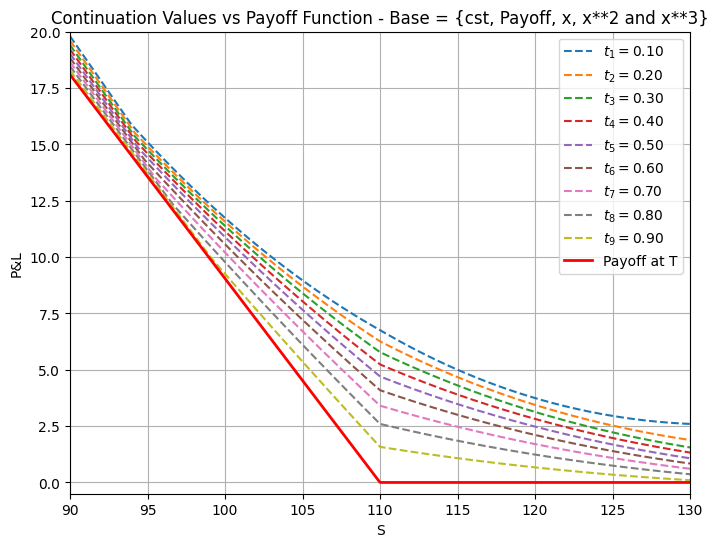

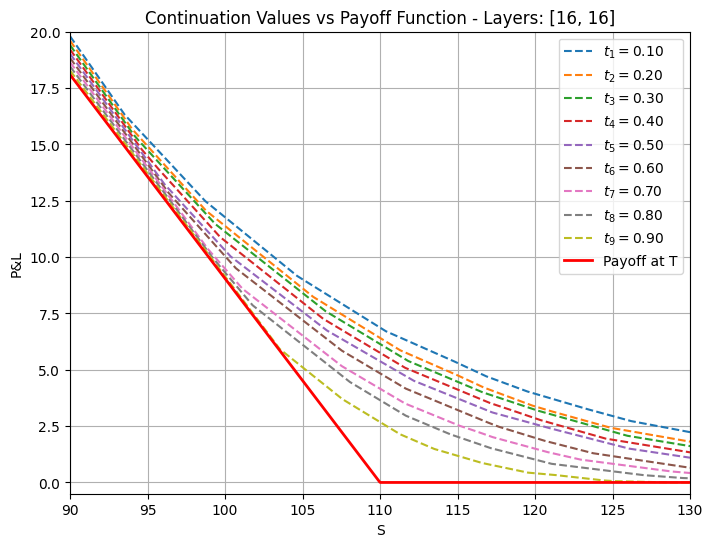

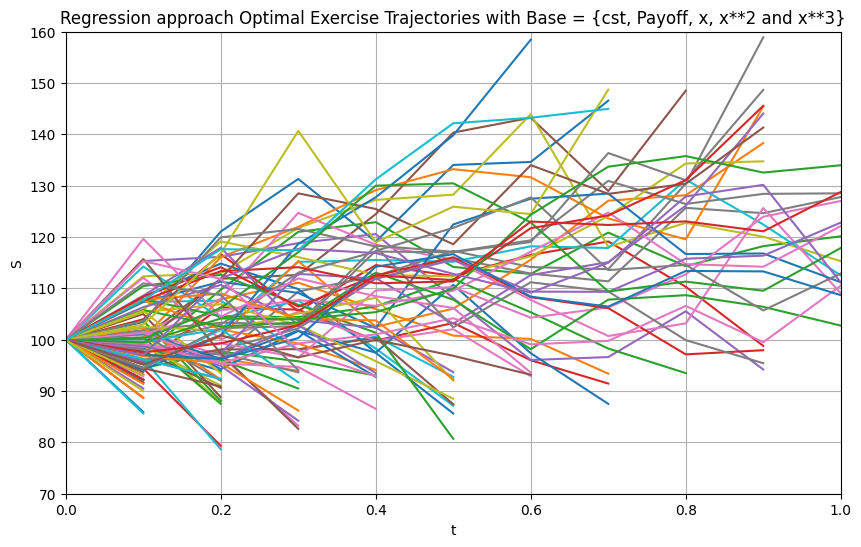

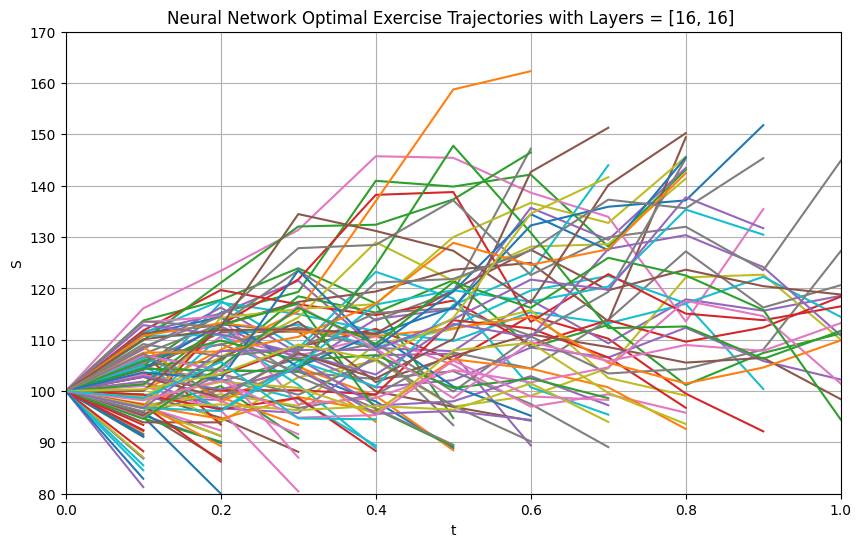


Regression model (Base: {cst, Payoff, x, x**2 and x**3})
Lower Bound: 11.9645
Upper Bound: 12.0008

Neural Network (layers: [16, 16])
Lower Bound: 11.9678
Upper Bound: 11.9812


In [185]:
#==================================== CALIBRATION PARAMETERS ====================================

layer_sizes = [16, 16]  # Neural network architecture
n_epochs = 20  # Number of epochs for training
batch_size = 2 * 1024  # Mini-batch size
learning_rate = 1e-3  # Learning rate for optimizer

def base(x, strike=K):
    x = np.array(x)
    return np.array([np.ones_like(x), np.maximum(K - x, 0), x, x**2, x**3])  # Regression basis functions

args_simu_calibration = (ts, n_paths, S0, vol, r, q, T, K, payoff_put, rng_calibration)  # Parameters for calibration simulation
args_Reg_calibration = base
args_NN_calibration = (layer_sizes, n_epochs, batch_size, learning_rate)  # Pack NN args

thetas_NN, mean_x, std_x, mean_y, std_y = calibration(args_simu_calibration, True, False, args_NN_calibration, args_Reg_calibration)  # Calibrate NN model
thetas_Reg = calibration(args_simu_calibration, False, True, args_NN_calibration, args_Reg_calibration)  # Calibrate regression model

#==================================== LOWER BOUND PARAMETERS ====================================

n_paths_lower_bound = 2**20
rng_lower_bound = np.random.default_rng(np.random.randint(0, 1_000_000))

args_Reg_lower_bound = (thetas_Reg,base)
args_NN_lower_bound = (thetas_NN, mean_x, std_x, mean_y, std_y, layer_sizes)
args_simu_lower_bound = (ts, n_paths_lower_bound, S0 , vol, r, q, T,K,payoff_put,rng_lower_bound)

lower_bound_Reg = lower_bound (args_simu_lower_bound, False, True, args_NN_calibration, args_Reg_lower_bound)
lower_bound_NN = lower_bound (args_simu_lower_bound, True, False, args_NN_lower_bound, args_Reg_lower_bound)

#==================================== UPPER BOUND PARAMETERS ====================================

ne_paths = 5000
nc_paths = 5000
rng_upper_bound = np.random.default_rng(np.random.randint(0, 1_000_000))
args_simu_upper_bound = ts, 2**10, ne_paths, nc_paths, S0 , vol, r, q, T,K,payoff_put, rng_upper_bound
args_Reg_upper_bound = (thetas_Reg,base,lower_bound_Reg)
args_NN_upper_bound = (thetas_NN, mean_x, std_x, mean_y, std_y, layer_sizes,lower_bound_NN)

upper_bound_Reg = upper_bound (args_simu_upper_bound, False, True, args_NN_upper_bound, args_Reg_upper_bound)
upper_bound_NN = upper_bound (args_simu_upper_bound, True, False, args_NN_upper_bound, args_Reg_upper_bound)

#==================================== PRINT AND PLOT DATA ====================================

plot_continuation (args_simu_calibration,False,True,args_NN_lower_bound,args_Reg_lower_bound,"Base = {cst, Payoff, x, x**2 and x**3}")
plot_continuation (args_simu_calibration,True,False,args_NN_lower_bound,args_Reg_lower_bound,"Layers: [16, 16]")

plot_optimal_trajectories_from_model(args_simu_calibration,False,True, args_NN_lower_bound,args_Reg_lower_bound,100,"Base = {cst, Payoff, x, x**2 and x**3}")
plot_optimal_trajectories_from_model(args_simu_calibration,True, False, args_NN_lower_bound,args_Reg_lower_bound,100,"Layers = [16, 16] ")

print("\n" + "="*100)
print("Regression model (Base: {cst, Payoff, x, x**2 and x**3})")
print(f"Lower Bound: {lower_bound_Reg:.4f}")
print(f"Upper Bound: {upper_bound_Reg:.4f}")
print("="*100)


print("\n" + "="*100)
print("Neural Network (layers: [16, 16])")
print(f"Lower Bound: {lower_bound_NN:.4f}")
print(f"Upper Bound: {upper_bound_NN:.4f}")
print("="*100)

100%|█████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.66s/it, loss=0.67]


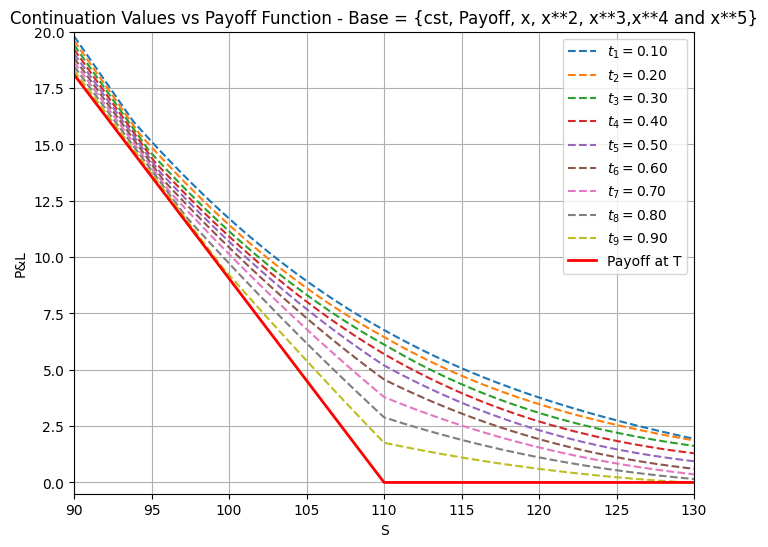

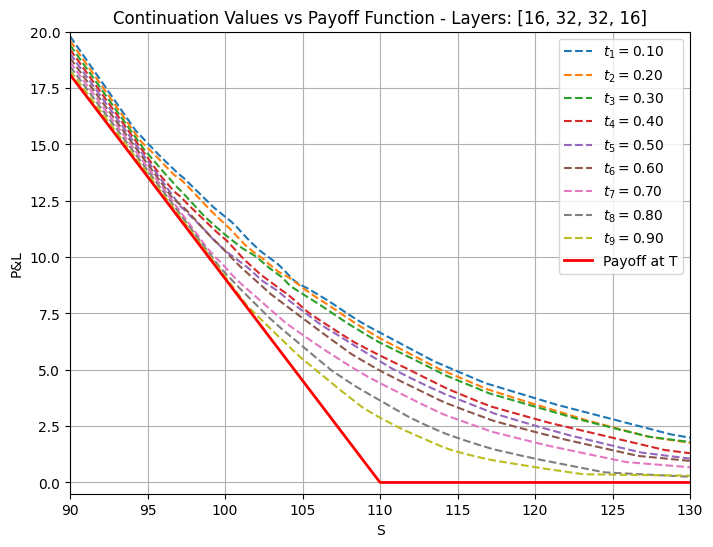

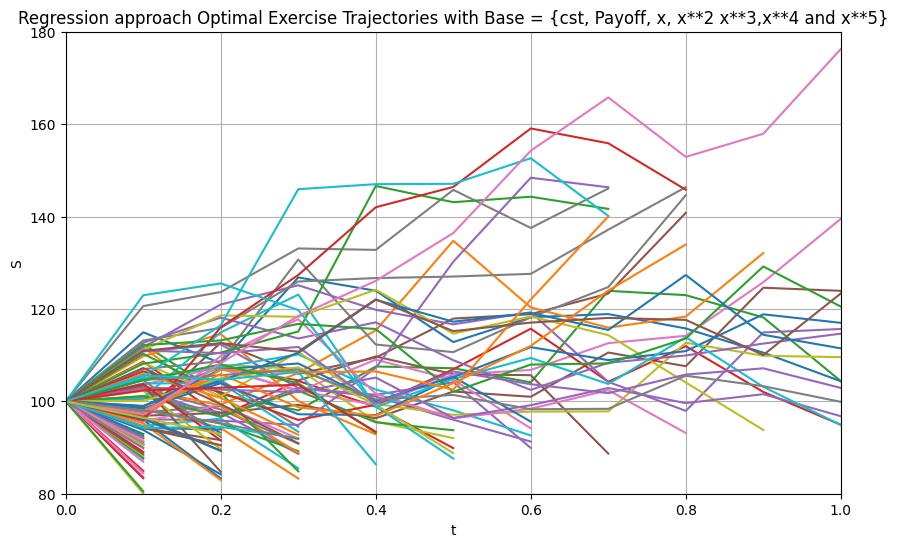

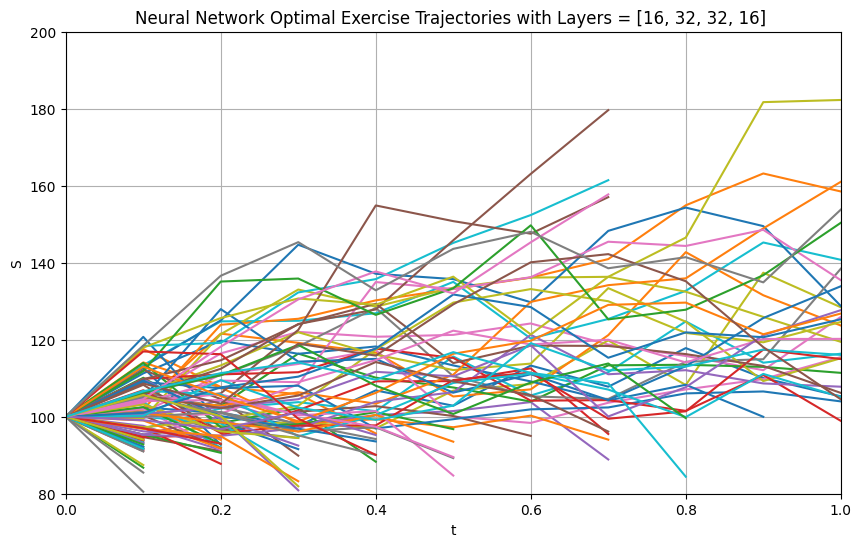


Regression model (Base: {cst, Payoff, x, x**2 x**3,x**4 and x**5})
Lower Bound: 11.9650
Upper Bound: 11.9858

Neural Network (layers: [16, 32, 32, 16])
Lower Bound: 11.9701
Upper Bound: 11.9773


In [186]:
#==================================== CALIBRATION PARAMETERS ====================================

layer_sizes = [16, 32, 32, 16]  # Neural network architecture
n_epochs = 20  # Number of epochs for training
batch_size = 2 * 1024  # Mini-batch size
learning_rate = 1e-3  # Learning rate for optimizer

def base(x, strike=K):
    x = np.array(x)
    return np.array([np.ones_like(x), np.maximum(K - x, 0), x, x**2, x**3,x**4,x**5])  # Regression basis functions

args_simu_calibration = (ts, n_paths, S0, vol, r, q, T, K, payoff_put, rng_calibration)  # Parameters for calibration simulation
args_Reg_calibration = base
args_NN_calibration = (layer_sizes, n_epochs, batch_size, learning_rate)  # Pack NN args

thetas_NN, mean_x, std_x, mean_y, std_y = calibration(args_simu_calibration, True, False, args_NN_calibration, args_Reg_calibration)  # Calibrate NN model
thetas_Reg = calibration(args_simu_calibration, False, True, args_NN_calibration, args_Reg_calibration)  # Calibrate regression model

#==================================== LOWER BOUND PARAMETERS ====================================

n_paths_lower_bound = 2**20
rng_lower_bound = np.random.default_rng(np.random.randint(0, 1_000_000))

args_Reg_lower_bound = (thetas_Reg,base)
args_NN_lower_bound = (thetas_NN, mean_x, std_x, mean_y, std_y, layer_sizes)
args_simu_lower_bound = (ts, n_paths_lower_bound, S0 , vol, r, q, T,K,payoff_put,rng_lower_bound)

lower_bound_Reg = lower_bound (args_simu_lower_bound, False, True, args_NN_calibration, args_Reg_lower_bound)
lower_bound_NN = lower_bound (args_simu_lower_bound, True, False, args_NN_lower_bound, args_Reg_lower_bound)

#==================================== UPPER BOUND PARAMETERS ====================================

ne_paths = 5000
nc_paths = 5000
rng_upper_bound = np.random.default_rng(np.random.randint(0, 1_000_000))
args_simu_upper_bound = ts, 2**10, ne_paths, nc_paths, S0 , vol, r, q, T,K,payoff_put, rng_upper_bound
args_Reg_upper_bound = (thetas_Reg,base,lower_bound_Reg)
args_NN_upper_bound = (thetas_NN, mean_x, std_x, mean_y, std_y, layer_sizes,lower_bound_NN)

upper_bound_Reg = upper_bound (args_simu_upper_bound, False, True, args_NN_upper_bound, args_Reg_upper_bound)
upper_bound_NN = upper_bound (args_simu_upper_bound, True, False, args_NN_upper_bound, args_Reg_upper_bound)

#==================================== PRINT AND PLOT DATA ====================================

plot_continuation (args_simu_calibration,False,True,args_NN_lower_bound,args_Reg_lower_bound,"Base = {cst, Payoff, x, x**2, x**3,x**4 and x**5}")
plot_continuation (args_simu_calibration,True,False,args_NN_lower_bound,args_Reg_lower_bound,"Layers: [16, 32, 32, 16]")

plot_optimal_trajectories_from_model(args_simu_calibration,False,True, args_NN_lower_bound,args_Reg_lower_bound,100,"Base = {cst, Payoff, x, x**2 x**3,x**4 and x**5}")
plot_optimal_trajectories_from_model(args_simu_calibration,True, False, args_NN_lower_bound,args_Reg_lower_bound,100,"Layers = [16, 32, 32, 16] ")

print("\n" + "="*100)
print("Regression model (Base: {cst, Payoff, x, x**2 x**3,x**4 and x**5})")
print(f"Lower Bound: {lower_bound_Reg:.4f}")
print(f"Upper Bound: {upper_bound_Reg:.4f}")
print("="*100)


print("\n" + "="*100)
print("Neural Network (layers: [16, 32, 32, 16])")
print(f"Lower Bound: {lower_bound_NN:.4f}")
print(f"Upper Bound: {upper_bound_NN:.4f}")
print("="*100)

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">Applications - Put ITM</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

In [193]:
S0 = 115  # Initial spot price
K = 110  # Strike price
T = 1  # Maturity in years
ts = np.linspace(0, T, 11)  # Time grid with 11 dates
vol = 0.25  # Volatility
r = 0.1  # Risk-free rate
n_paths = 2**20  # Number of simulated paths
q = 0.  # Dividend yield
rng_calibration = np.random.default_rng(np.random.randint(0, 1_000_000))  # RNG for calibration

def payoff_put(S, K): 
    return np.maximum((K - S), 0)  # European put payoff

100%|█████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.02s/it, loss=1.08]


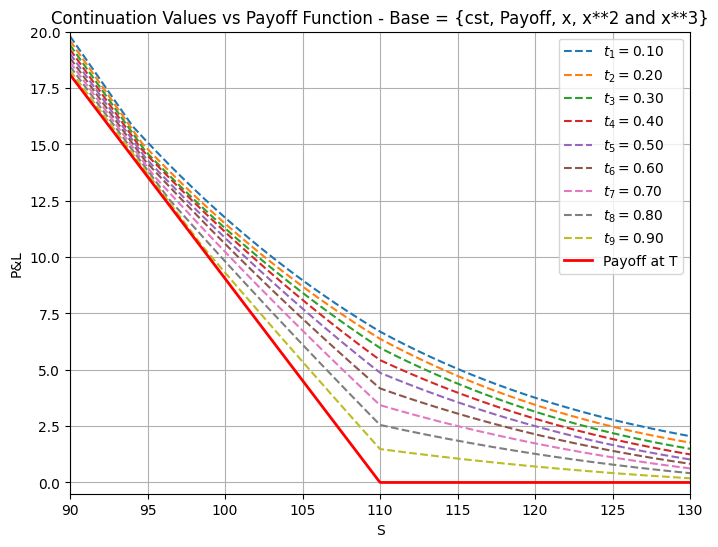

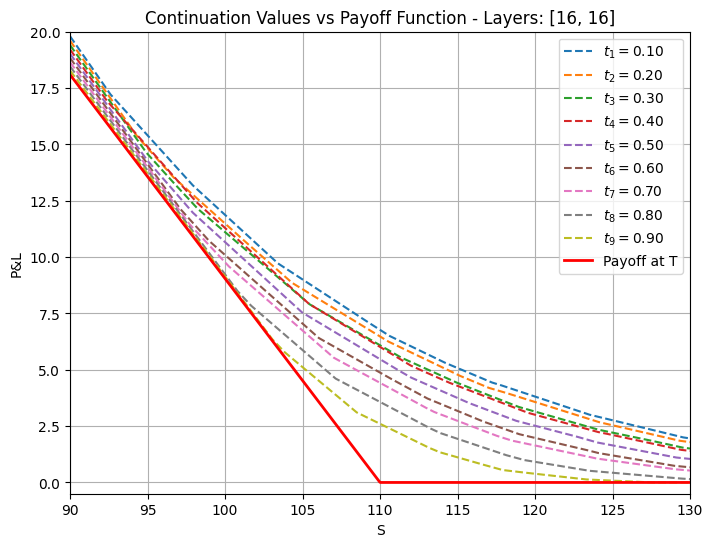

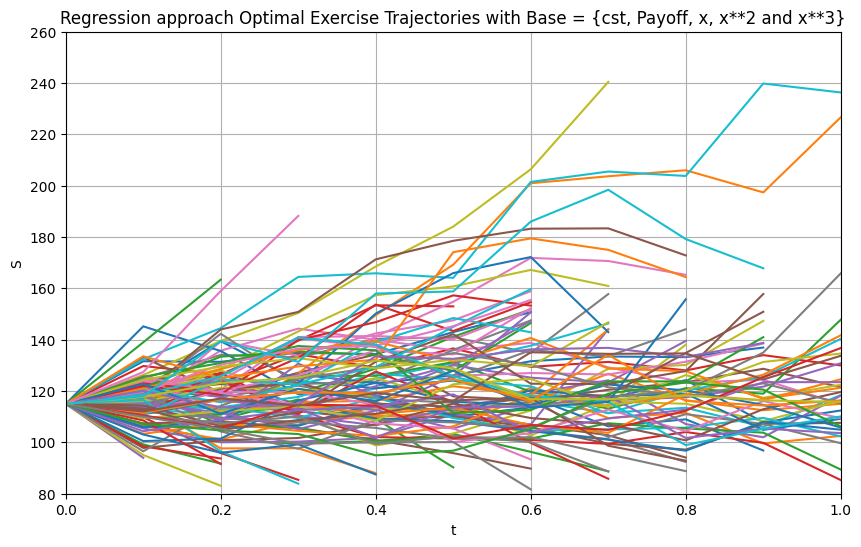

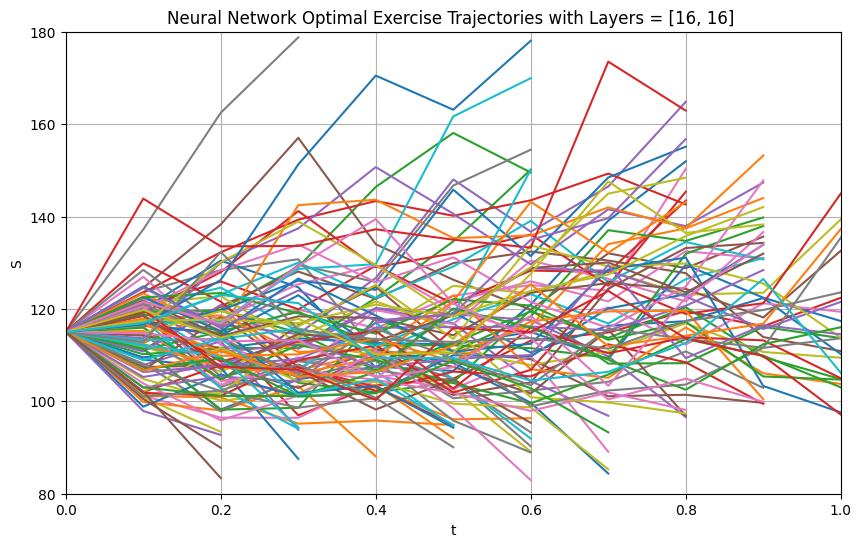


Regression model (Base: {cst, Payoff, x, x**2 and x**3})
Lower Bound: 5.3546
Upper Bound: 5.4033

Neural Network (layers: [16, 16])
Lower Bound: 5.3938
Upper Bound: 5.4144


In [194]:
#==================================== CALIBRATION PARAMETERS ====================================

layer_sizes = [16, 16]  # Neural network architecture
n_epochs = 20  # Number of epochs for training
batch_size = 2 * 1024  # Mini-batch size
learning_rate = 1e-3  # Learning rate for optimizer

def base(x, strike=K):
    x = np.array(x)
    return np.array([np.ones_like(x), np.maximum(K - x, 0), x, x**2, x**3])  # Regression basis functions

args_simu_calibration = (ts, n_paths, S0, vol, r, q, T, K, payoff_put, rng_calibration)  # Parameters for calibration simulation
args_Reg_calibration = base
args_NN_calibration = (layer_sizes, n_epochs, batch_size, learning_rate)  # Pack NN args

thetas_NN, mean_x, std_x, mean_y, std_y = calibration(args_simu_calibration, True, False, args_NN_calibration, args_Reg_calibration)  # Calibrate NN model
thetas_Reg = calibration(args_simu_calibration, False, True, args_NN_calibration, args_Reg_calibration)  # Calibrate regression model

#==================================== LOWER BOUND PARAMETERS ====================================

n_paths_lower_bound = 2**20
rng_lower_bound = np.random.default_rng(np.random.randint(0, 1_000_000))

args_Reg_lower_bound = (thetas_Reg,base)
args_NN_lower_bound = (thetas_NN, mean_x, std_x, mean_y, std_y, layer_sizes)
args_simu_lower_bound = (ts, n_paths_lower_bound, S0 , vol, r, q, T,K,payoff_put,rng_lower_bound)

lower_bound_Reg = lower_bound (args_simu_lower_bound, False, True, args_NN_calibration, args_Reg_lower_bound)
lower_bound_NN = lower_bound (args_simu_lower_bound, True, False, args_NN_lower_bound, args_Reg_lower_bound)

#==================================== UPPER BOUND PARAMETERS ====================================

ne_paths = 5000
nc_paths = 5000
rng_upper_bound = np.random.default_rng(np.random.randint(0, 1_000_000))
args_simu_upper_bound = ts, 2**10, ne_paths, nc_paths, S0 , vol, r, q, T,K,payoff_put, rng_upper_bound
args_Reg_upper_bound = (thetas_Reg,base,lower_bound_Reg)
args_NN_upper_bound = (thetas_NN, mean_x, std_x, mean_y, std_y, layer_sizes,lower_bound_NN)

upper_bound_Reg = upper_bound (args_simu_upper_bound, False, True, args_NN_upper_bound, args_Reg_upper_bound)
upper_bound_NN = upper_bound (args_simu_upper_bound, True, False, args_NN_upper_bound, args_Reg_upper_bound)

#==================================== PRINT AND PLOT DATA ====================================

plot_continuation (args_simu_calibration,False,True,args_NN_lower_bound,args_Reg_lower_bound,"Base = {cst, Payoff, x, x**2 and x**3}")
plot_continuation (args_simu_calibration,True,False,args_NN_lower_bound,args_Reg_lower_bound,"Layers: [16, 16]")

plot_optimal_trajectories_from_model(args_simu_calibration,False,True, args_NN_lower_bound,args_Reg_lower_bound,100,"Base = {cst, Payoff, x, x**2 and x**3}")
plot_optimal_trajectories_from_model(args_simu_calibration,True, False, args_NN_lower_bound,args_Reg_lower_bound,100,"Layers = [16, 16] ")

print("\n" + "="*100)
print("Regression model (Base: {cst, Payoff, x, x**2 and x**3})")
print(f"Lower Bound: {lower_bound_Reg:.4f}")
print(f"Upper Bound: {upper_bound_Reg:.4f}")
print("="*100)


print("\n" + "="*100)
print("Neural Network (layers: [16, 16])")
print(f"Lower Bound: {lower_bound_NN:.4f}")
print(f"Upper Bound: {upper_bound_NN:.4f}")
print("="*100)

100%|█████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.73s/it, loss=1.18]


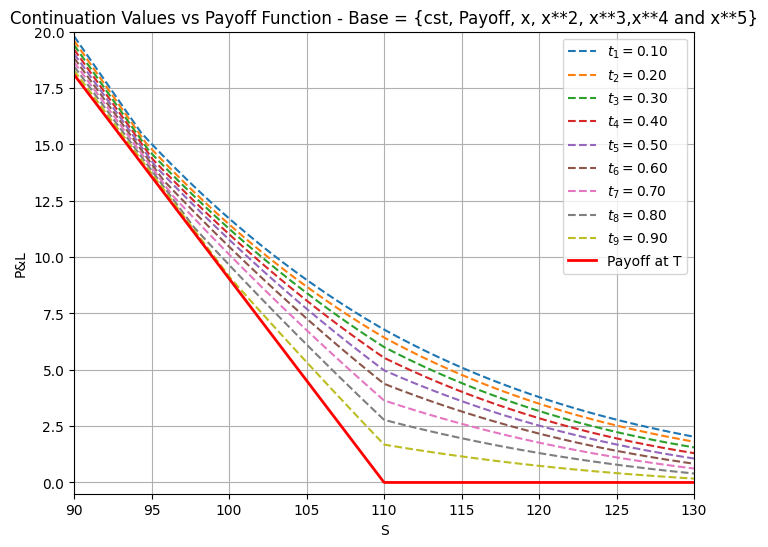

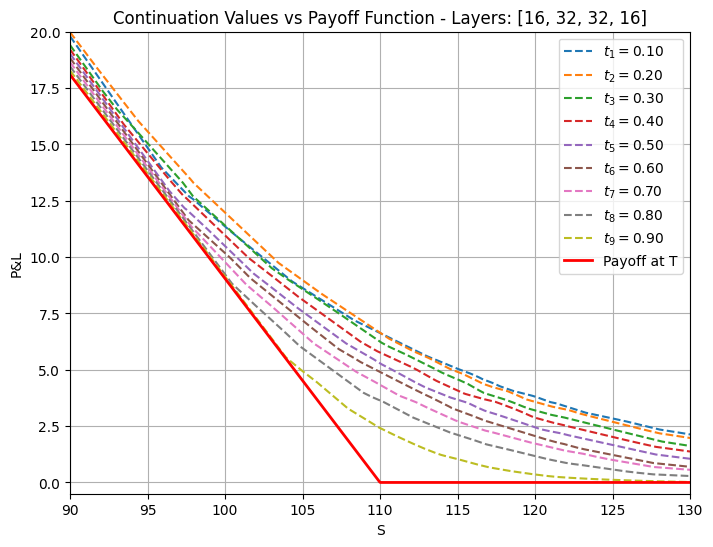

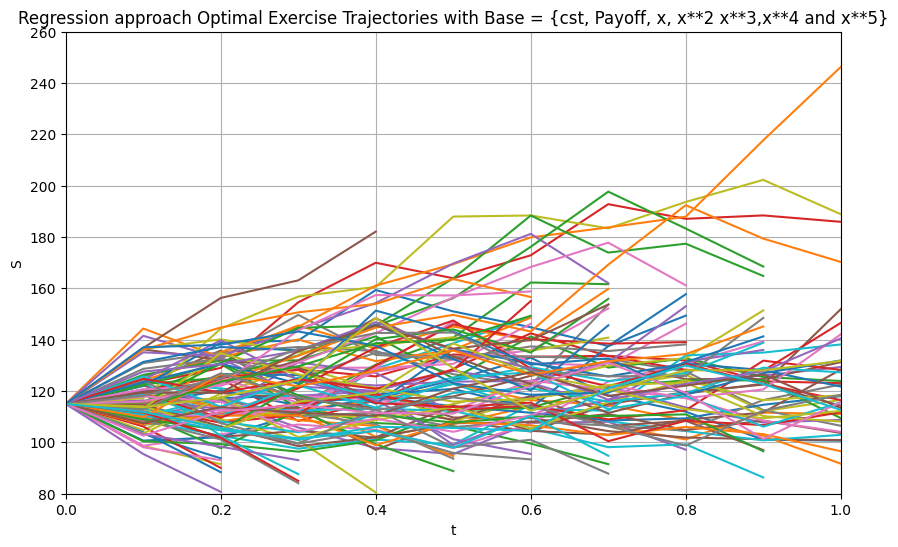

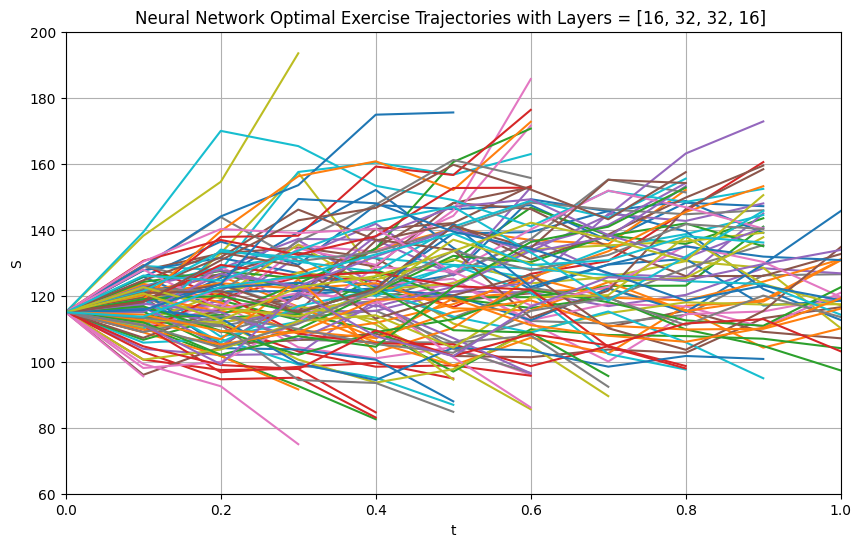


Regression model (Base: {cst, Payoff, x, x**2 x**3,x**4 and x**5})
Lower Bound: 5.3721
Upper Bound: 5.3953

Neural Network (layers: [16, 32, 32, 16])
Lower Bound: 5.3776
Upper Bound: 5.4039


In [195]:
#==================================== CALIBRATION PARAMETERS ====================================

layer_sizes = [16, 32, 32, 16]  # Neural network architecture
n_epochs = 20  # Number of epochs for training
batch_size = 2 * 1024  # Mini-batch size
learning_rate = 1e-3  # Learning rate for optimizer

def base(x, strike=K):
    x = np.array(x)
    return np.array([np.ones_like(x), np.maximum(K - x, 0), x, x**2, x**3,x**4,x**5])  # Regression basis functions

args_simu_calibration = (ts, n_paths, S0, vol, r, q, T, K, payoff_put, rng_calibration)  # Parameters for calibration simulation
args_Reg_calibration = base
args_NN_calibration = (layer_sizes, n_epochs, batch_size, learning_rate)  # Pack NN args

thetas_NN, mean_x, std_x, mean_y, std_y = calibration(args_simu_calibration, True, False, args_NN_calibration, args_Reg_calibration)  # Calibrate NN model
thetas_Reg = calibration(args_simu_calibration, False, True, args_NN_calibration, args_Reg_calibration)  # Calibrate regression model

#==================================== LOWER BOUND PARAMETERS ====================================

n_paths_lower_bound = 2**20
rng_lower_bound = np.random.default_rng(np.random.randint(0, 1_000_000))

args_Reg_lower_bound = (thetas_Reg,base)
args_NN_lower_bound = (thetas_NN, mean_x, std_x, mean_y, std_y, layer_sizes)
args_simu_lower_bound = (ts, n_paths_lower_bound, S0 , vol, r, q, T,K,payoff_put,rng_lower_bound)

lower_bound_Reg = lower_bound (args_simu_lower_bound, False, True, args_NN_calibration, args_Reg_lower_bound)
lower_bound_NN = lower_bound (args_simu_lower_bound, True, False, args_NN_lower_bound, args_Reg_lower_bound)

#==================================== UPPER BOUND PARAMETERS ====================================

ne_paths = 5000
nc_paths = 5000
rng_upper_bound = np.random.default_rng(np.random.randint(0, 1_000_000))
args_simu_upper_bound = ts, 2**10, ne_paths, nc_paths, S0 , vol, r, q, T,K,payoff_put, rng_upper_bound
args_Reg_upper_bound = (thetas_Reg,base,lower_bound_Reg)
args_NN_upper_bound = (thetas_NN, mean_x, std_x, mean_y, std_y, layer_sizes,lower_bound_NN)

upper_bound_Reg = upper_bound (args_simu_upper_bound, False, True, args_NN_upper_bound, args_Reg_upper_bound)
upper_bound_NN = upper_bound (args_simu_upper_bound, True, False, args_NN_upper_bound, args_Reg_upper_bound)

#==================================== PRINT AND PLOT DATA ====================================

plot_continuation (args_simu_calibration,False,True,args_NN_lower_bound,args_Reg_lower_bound,"Base = {cst, Payoff, x, x**2, x**3,x**4 and x**5}")
plot_continuation (args_simu_calibration,True,False,args_NN_lower_bound,args_Reg_lower_bound,"Layers: [16, 32, 32, 16]")

plot_optimal_trajectories_from_model(args_simu_calibration,False,True, args_NN_lower_bound,args_Reg_lower_bound,100,"Base = {cst, Payoff, x, x**2 x**3,x**4 and x**5}")
plot_optimal_trajectories_from_model(args_simu_calibration,True, False, args_NN_lower_bound,args_Reg_lower_bound,100,"Layers = [16, 32, 32, 16] ")

print("\n" + "="*100)
print("Regression model (Base: {cst, Payoff, x, x**2 x**3,x**4 and x**5})")
print(f"Lower Bound: {lower_bound_Reg:.4f}")
print(f"Upper Bound: {upper_bound_Reg:.4f}")
print("="*100)


print("\n" + "="*100)
print("Neural Network (layers: [16, 32, 32, 16])")
print(f"Lower Bound: {lower_bound_NN:.4f}")
print(f"Upper Bound: {upper_bound_NN:.4f}")
print("="*100)